* Source: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
* Source: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_selection/_rfe.py

In [89]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from timerun import time_code, time_func

class SVM_RFE():
    def __init__(self, n_features_to_select, step=4):
        self.n_features_to_select = n_features_to_select
        self.step = step

    @time_func
    def fit(self, X0, y):
        self.scores_ = {}
        
        n_features_to_select = self.n_features_to_select
        n_features = X0.shape[1]
        if n_features_to_select is None:
            n_features_to_select = n_features
            
        support_ = np.ones(n_features, dtype=bool)
        ranking_ = np.ones(n_features, dtype=int)
    
        # np.sum(support_) is the number of selected features.
        # It starts at n_features and decreases every iteration.
        while np.sum(support_) > n_features_to_select:
            
            # Remaining features, represented with a list of indices.
            features = np.arange(n_features)[support_]
            X = X0[:, features]

            # Declare and train the SVM
            with time_code('SVM #' + str(np.sum(support_))):
                estimator = LinearSVC(C=1000, max_iter=2000, dual=False)
                estimator.fit(X, y)

            # Get importance and rank them
            importances = estimator.coef_ ** 2
            ranks = np.argsort(importances)

            # Flatten ranks, required for Multi-Class Classification.
            ranks = np.ravel(ranks)

            # Calculate t (step)
            threshold = min(self.step, np.sum(support_) - n_features_to_select)

            # Eliminate the worse feature
            for i in range(0, threshold):
                selected_feature = features[ranks[i]]
                support_[selected_feature] = False
                ranking_[np.logical_not(support_)] += 1

            # Record score
            self.scores_[np.sum(support_)] = estimator.score(X,y)


        # Set final attributes
        self.n_features_ = support_.sum()
        self.support_ = support_
        self.ranking_ = ranking_

        return self


# Feature Selection

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(train_data.to_numpy(), [1200])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1200])


In [91]:
# Create the RFE object and rank each pixel
rfe = SVM_RFE(n_features_to_select=1, step=8)
rfe.fit(X_train, y_train)

SVM #500 - 00:00:01.245480900
SVM #492 - 00:00:01.349983400
SVM #484 - 00:00:01.202031600
SVM #476 - 00:00:01.145349800
SVM #468 - 00:00:01.196786300
SVM #460 - 00:00:01.101080400
SVM #452 - 00:00:01.074934800
SVM #444 - 00:00:01.007632400
SVM #436 - 00:00:00.894026500
SVM #428 - 00:00:00.974449100
SVM #420 - 00:00:01.051097700
SVM #412 - 00:00:00.922178400
SVM #404 - 00:00:00.769024500
SVM #396 - 00:00:00.967441900
SVM #388 - 00:00:00.896746300
SVM #380 - 00:00:00.835289000
SVM #372 - 00:00:00.820944000
SVM #364 - 00:00:00.671660700
SVM #356 - 00:00:00.733644300
SVM #348 - 00:00:00.715082900
SVM #340 - 00:00:00.777149400
SVM #332 - 00:00:00.678762900
SVM #324 - 00:00:00.712521000
SVM #316 - 00:00:00.595418300
SVM #308 - 00:00:00.571655200
SVM #300 - 00:00:00.592882700
SVM #292 - 00:00:00.515657600
SVM #284 - 00:00:00.526721200
SVM #276 - 00:00:00.464407100
SVM #268 - 00:00:00.566954500
SVM #260 - 00:00:00.394522900
SVM #252 - 00:00:00.400766300
SVM #244 - 00:00:00.405547000
SVM #236 -

# Testing

In [92]:
rfe.ranking_
np.argsort(rfe.ranking_)

array([205,  90, 332, 451,  28,   7, 168, 227, 387,  39, 402, 394, 120,
       237, 445, 420, 471, 207, 167, 456, 496, 423, 491,  96, 248, 189,
        74, 148, 323, 152,  22, 466,   5, 407, 154,  48, 424, 378,  23,
       214, 133, 380, 447, 325, 282, 258, 162, 422, 317, 293, 413, 109,
       198, 446, 301, 126, 497, 331, 345, 217, 236, 166, 306,  40, 383,
        69, 449,  76, 121, 357, 425, 122, 309, 163, 278,  68, 454, 434,
       476, 103, 101, 450,  44,   9,  85, 492, 233, 414, 410, 416, 137,
        30, 292, 142,  26, 200,  83, 384, 247, 433, 296,  73, 480, 232,
       461, 231, 153,  63,  86, 473,  27, 426, 361, 481,  49, 388, 275,
       226, 298,  12, 102, 219, 348, 364, 212, 182, 185, 150, 482,  42,
       204,  53, 139, 265,  56,  41, 310, 399,  61, 453, 321, 493, 382,
       130,  34, 115, 235, 342, 474,  38, 347, 415, 328, 300, 311,  19,
        21, 412, 459, 159, 395, 338, 183, 336,  64, 286, 490,  67,  60,
        25, 337, 314,  92,  88, 452, 186,  29, 477, 346, 252, 21

In [108]:
test_scores = {}
test_selection = np.argsort(rfe.ranking_)

rfe.ranking_[test_selection[1]] == 2

True

In [112]:
test_scores = {}
test_selection = np.argsort(rfe.ranking_)

for i in range(1, 500, 16):
    features = test_selection[:i]
 
    with time_code('TEST SVM #' + str(i)):
        svm = LinearSVC(C=1000, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

    test_scores[i] = svm.score(X_train[:,features], y_train)

TEST SVM #1 - 00:00:00.002469900
TEST SVM #17 - 00:00:00.003622300
TEST SVM #33 - 00:00:00.009325200
TEST SVM #49 - 00:00:00.015958400
TEST SVM #65 - 00:00:00.019982400
TEST SVM #81 - 00:00:00.036588500
TEST SVM #97 - 00:00:00.064101700
TEST SVM #113 - 00:00:00.103583800
TEST SVM #129 - 00:00:00.108384300
TEST SVM #145 - 00:00:00.120285400
TEST SVM #161 - 00:00:00.146834700
TEST SVM #177 - 00:00:00.204791100
TEST SVM #193 - 00:00:00.256826100
TEST SVM #209 - 00:00:00.326755900
TEST SVM #225 - 00:00:00.326554700
TEST SVM #241 - 00:00:00.429776800
TEST SVM #257 - 00:00:00.498755000
TEST SVM #273 - 00:00:00.522362400
TEST SVM #289 - 00:00:00.506997600
TEST SVM #305 - 00:00:00.564822800
TEST SVM #321 - 00:00:00.550484200
TEST SVM #337 - 00:00:00.693437000
TEST SVM #353 - 00:00:00.784355000
TEST SVM #369 - 00:00:00.670720000
TEST SVM #385 - 00:00:00.882601600
TEST SVM #401 - 00:00:00.755193500
TEST SVM #417 - 00:00:00.782510000
TEST SVM #433 - 00:00:00.987734000
TEST SVM #449 - 00:00:00.973

In [104]:
import random
random_scores = {}
random_selection = random.sample(range(0, 500), 500)
for i in range(1, 500, 8):
    features = random_selection[:i]
 
    with time_code('TEST SVM #' + str(i)):
        svm = LinearSVC(C=1000, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

    random_scores[i] = svm.score(X_test[:,features], y_test)

TEST SVM #1 - 00:00:00.002799700
TEST SVM #9 - 00:00:00.004159400
TEST SVM #17 - 00:00:00.001916100
TEST SVM #25 - 00:00:00.048015200
TEST SVM #33 - 00:00:00.012929000
TEST SVM #41 - 00:00:00.023066400
TEST SVM #49 - 00:00:00.008838900
TEST SVM #57 - 00:00:00.040178000
TEST SVM #65 - 00:00:00.037336700
TEST SVM #73 - 00:00:00.025689500
TEST SVM #81 - 00:00:00.054261600
TEST SVM #89 - 00:00:00.039873800
TEST SVM #97 - 00:00:00.065701500
TEST SVM #105 - 00:00:00.113943500
TEST SVM #113 - 00:00:00.092358800
TEST SVM #121 - 00:00:00.113331200
TEST SVM #129 - 00:00:00.118565100
TEST SVM #137 - 00:00:00.126472900
TEST SVM #145 - 00:00:00.181083700
TEST SVM #153 - 00:00:00.186457400
TEST SVM #161 - 00:00:00.240281400
TEST SVM #169 - 00:00:00.292941000
TEST SVM #177 - 00:00:00.253142400
TEST SVM #185 - 00:00:00.300591300
TEST SVM #193 - 00:00:00.259763100
TEST SVM #201 - 00:00:00.289296800
TEST SVM #209 - 00:00:00.378275100
TEST SVM #217 - 00:00:00.335140900
TEST SVM #225 - 00:00:00.349451200


# Analysis

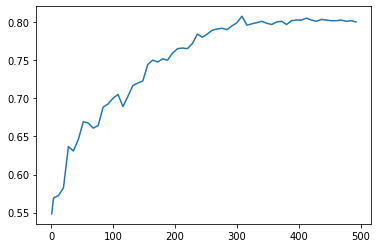

In [97]:
plt.plot(rfe.scores_.keys(), rfe.scores_.values())

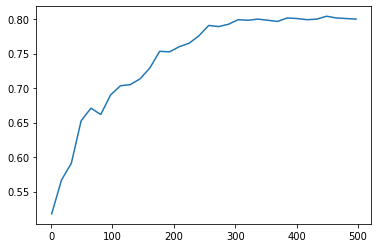

In [113]:
plt.plot(test_scores.keys(), test_scores.values())

The machine doesn't work very well, with a maximum score arround 0.57 on the test set. Clearly, there is overfitting, and altough using less features improves a bit the score, it is a marginal amount.

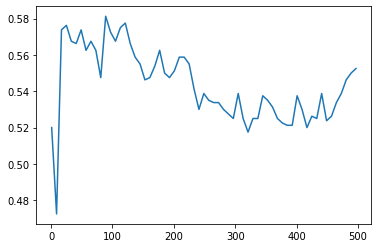

In [105]:
plt.plot(random_scores.keys(), random_scores.values())